Lyapunov Stability 

2nd approach para encontrar estabilidad de un SNL

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 

In [37]:
#CI
x0=[1e-1,1e-2]

#parametros
t=np.linspace(0,5,100)
h=1e-3


In [13]:
#definir SNL 

def SNL(y, t, x1, x2):
    x1, x2 = y   # hacemos que y tome los valores de x1 & x2 en una matriz 
    
    
    dxdt = [x2-x1*(x1**2+x2**2),
            -x1-x2*(x1**2+x2**2)]
    
    return dxdt


In [14]:
#definimos el dominio D
x1=np.linspace(-3,3,100)
x2=np.linspace(-2,2,100)

#para poder usar la malla de D 
X1,X2=np.meshgrid(x1,x2)

V=lambda x1,x2: x1**2+x2**2 #la funcion definida 


In [28]:
sol = odeint(SNL, x0, t, args=(x1,x2))

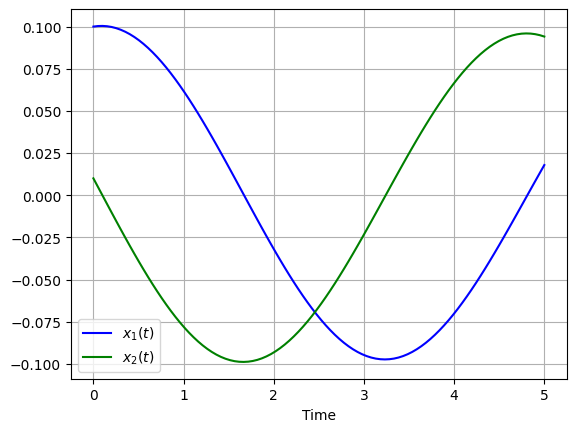

In [16]:
#graficar las soluciones 

plt.plot(t, sol[:, 0], 'b', label = r'$x_1(t)$') 
plt.plot(t, sol[:, 1], 'g', label = r'$x_2(t)$')  
plt.legend(loc='best')
plt.xlabel('Time')
plt.grid()
plt.show()

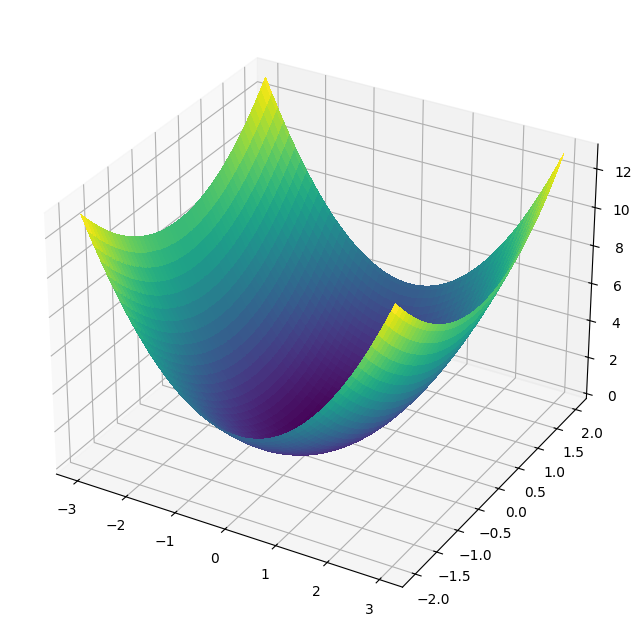

In [29]:
#graficar tipo surface 
fig, ax= plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
surf=ax.plot_surface(X1,X2,V(X1,X2), cmap='viridis', linewidth=0,antialiased = False)
#para obtener las curvas de nivel 
#ax.contour(X1,X2, V(x1, X2), cmap='viridis',offset = -1)

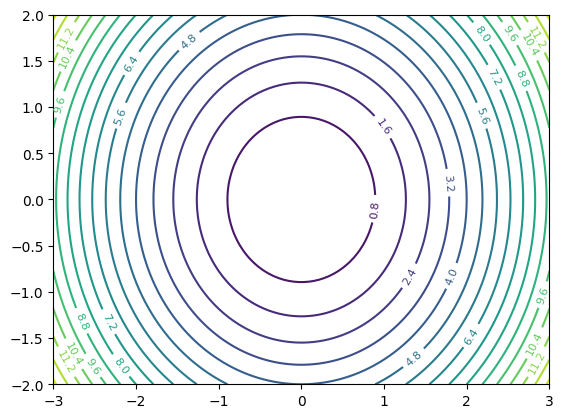

In [40]:
# Crear la figura solamente las curvas de nivel 
fig, ax = plt.subplots()

# Dibujar las curvas de nivel
contour = ax.contour(X1, X2, V(X1,X2), levels=20, cmap='viridis')

# Añadir etiquetas a las curvas de nivel
ax.clabel(contour, inline=True, fontsize=8)

# Mostrar la gráfica
plt.show()

TypeError: quiver() takes from 2 to 5 positional arguments but 6 were given

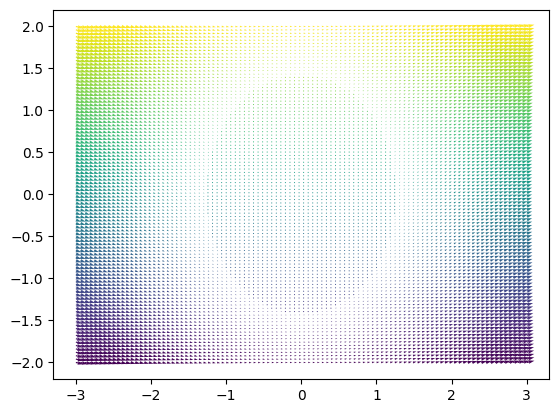

In [41]:
#Definir el campo vectorial u y v
u = 2*x1
v = 2*x2

# #Usamos quiver para graficar un campo vectorial en 2D.
plt.figure()
plt.quiver(X1, X2, V(X1, X2), X1, X2)

# Generamos la tercer componente del campo, en este caso 0
w = np.zeros_like(X1)

# Graficamos el campo vectorial en 3D
ax.quiver(X1, X2, V(X1, X2), u, v, w, length=0.2, color='r')


plt.show()



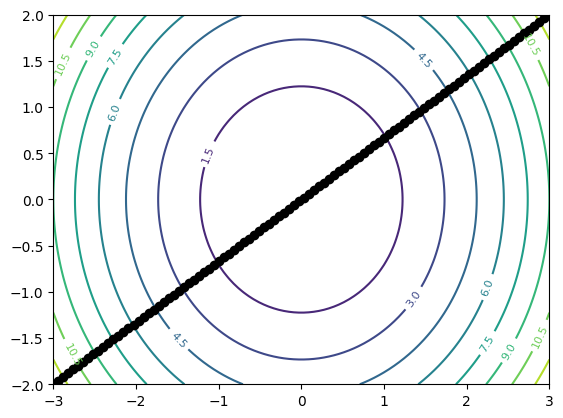

In [42]:
plt.figure()
contours=plt.contour(X1,X2,V(X1,X2),10)
plt.clabel(contours,inline=True, fontsize=8)
plt.plot(x1,x2,'o--k')

# Mostrar la gráfica
plt.show()